In [2]:
# pyplot for plotting
# numpy for vectorized array operations
# pandas for proper tabular manipulation
# scipy stats for our subversions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import viz # curriculum viz example code

np.random.seed(123)

In [3]:
# 1 Poisson bank line 2 cars
λ = 2
cars = stats.poisson(λ)

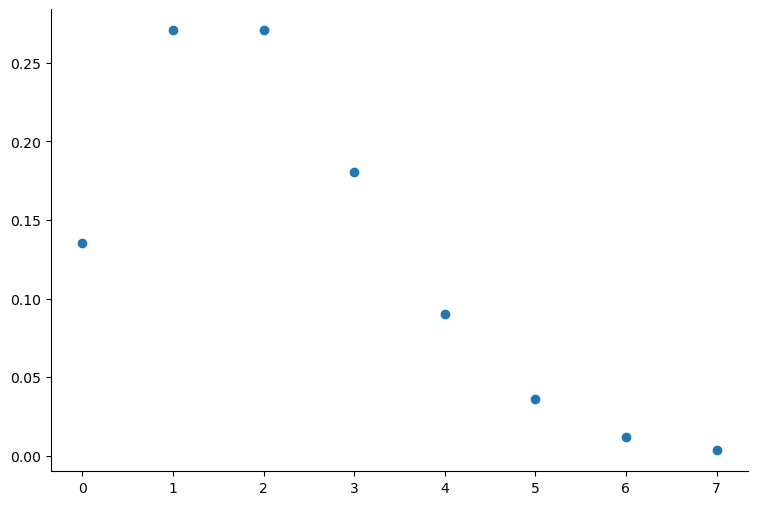

In [13]:
x = np.arange(0,8)
y =[cars.pmf(i) for i in x]
plt.scatter(x,y)

In [7]:
# Probability of ZERO cars in noon hour
cars.cdf(0)

0.1353352832366127

In [9]:
# can also be found with .pmf, because ZERO is the lowest possible value in set
cars.pmf(0)

0.1353352832366127

In [12]:
# Prob of 3 or more cars
cars.sf(2)

0.32332358381693654

In [15]:
# Prob of 1 or more cars
cars.sf(1)

0.5939941502901616

In [16]:
cars.cdf(1) #reciprocal

0.40600584970983794

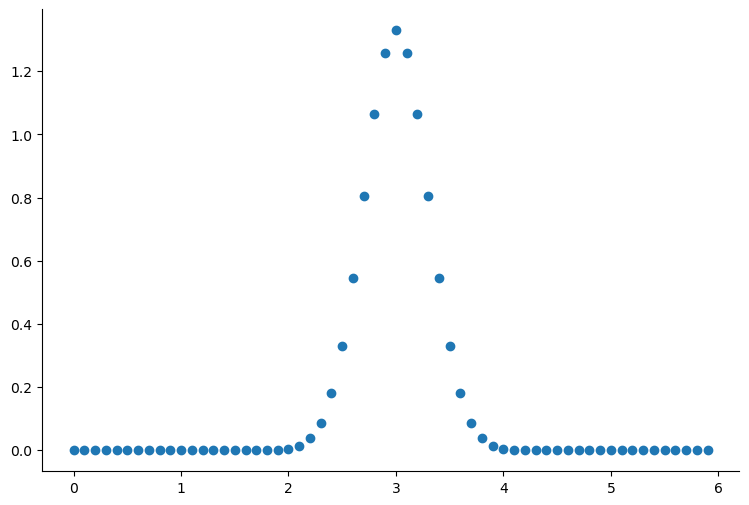

In [19]:
# 2 Grades of University students mean 3 stdv of 0.3
grade_dist = stats.norm(3,0.3)
x = np.arange(0,6,0.1)
y =[grade_dist.pdf(i) for i in x]
plt.scatter(x,y)

In [21]:
# grade needed for top 5% of class
grade_dist.isf(0.05)

3.4934560880854417

In [23]:
#what GPA is cutoff for bottom 15%?
grade_dist.ppf(0.15)

2.689069983151863

In [25]:
# scholarship for students in third decile, ie 20-30 % of class rank...range of third decile?
grade_dist.ppf(0.2) # 2.75   2.75 to 2.84

2.7475136299281258

In [26]:
grade_dist.ppf(0.3) # 2.84

2.842679846187588

In [ ]:
# YES a 2.8 GPS qualifies for this scholarship

In [30]:
# a GPA of 3.5 is in which percentile?

1 - grade_dist.sf(3.5) # 95th percentile.....95.2

0.9522096477271853

In [31]:
# 3 Marketing Website click thru rate of 0.02 
97 / 4326 # 0.022

0.022422561257512713

In [45]:
#Poisson clickthru rate 0.02
λ = 2
click = stats.poisson(λ)

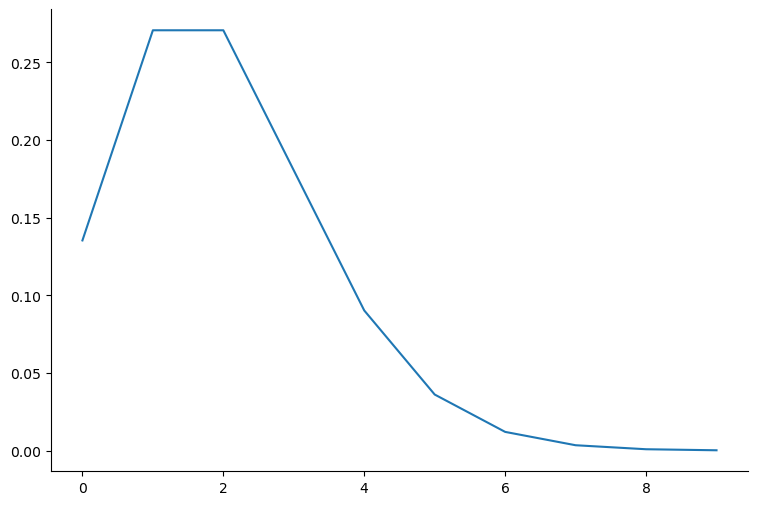

In [49]:
x = np.arange(0,10)
y =[click.pmf(i) for i in x]
plt.plot(x,y)

In [47]:
click.sf(97 / 4326)

0.8646647167633873

In [70]:
# 4 Stats HW with random Guessses for prob rounded to .00 nearest hundreth
# Binomial Parameters:
random_prob = stats.binom(100,0.01) # number of trials and prob rate of win and (number of wins)

In [76]:
random_prob.cdf(60)

1.0

<BarContainer object of 1 artists>

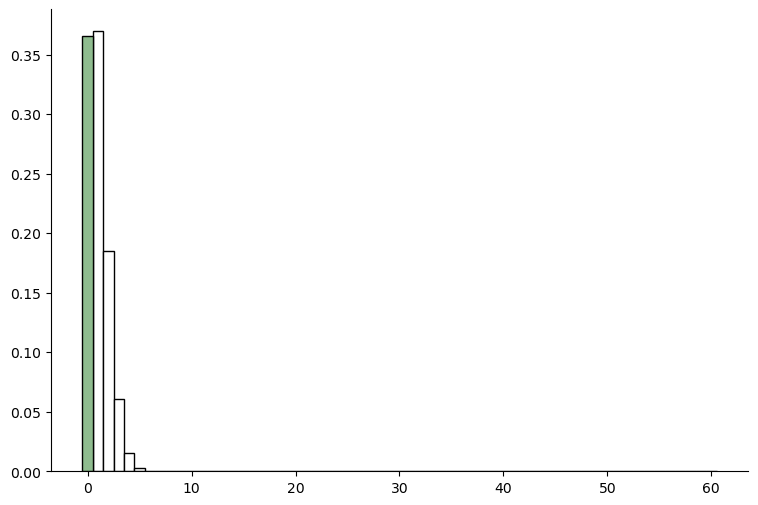

In [75]:
x = np.arange(1, 61)
y = stats.binom(100, .01).pmf(x)
plt.bar(x, y, width=1, edgecolor='black', color='white')

plt.bar(0, stats.binom(100, .01).pmf(0), width=1, color='darkseagreen', edgecolor='black')
#plt.title('Binomial Distribution for n=20, p=.05')
# plt.xlabel('x')
# plt.ylabel('pmf(x)')

# plt.annotate('$P(X = 0) = {:.3f}$'.format(stats.binom(20, .05).pmf(0)),
#              (0, stats.binom(20, .05).pmf(0)), xytext=(5, .25),
#              arrowprops={'arrowstyle': '->'})

In [108]:
# 5 Cleanup Break Room... 0.03 chance that room is cleaned each day 59.4 students visit 

clean_room = stats.binom(59,0.03)
clean_room.pmf(1)

0.30250590303772024

In [124]:
clean_day = stats.binom(119,0.03)
clean_day.pmf(2)

0.17903353696689692

In [125]:
clean_day = stats.binom(420,0.03)
clean_day.pmf(7)

0.03273873669874952

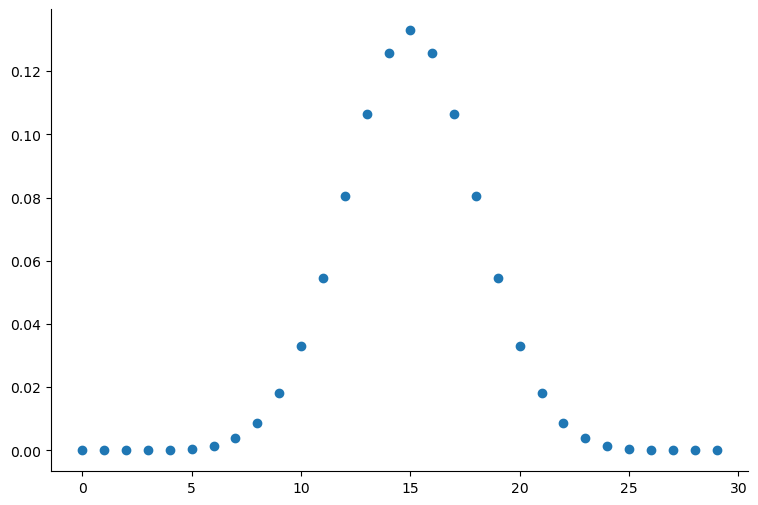

In [127]:
# 6 LUNCH with mean =15 stdv =3
lunch_dist = stats.norm(15,3)
x = np.arange(0,30)
y =[lunch_dist.pdf(i) for i in x]
plt.scatter(x,y)

In [132]:
lunch_dist.cdf(17)

0.7475074624530771

In [134]:
# 7 Connect to employees DB find avg and std of CURRENT salaries

In [135]:
import env
# [protocol]://[user]:[password]@[host]/[database_name]
# mysql+pymysql://codeup:p@assw0rd@123.123.123.123/some_db

In [ ]:
# def get_db_url(u_name,pwd,h_name,db_name):
#     url = f'mysql+pymysql://{u_name}:{pwd}@{h_name}/{db_name}'
#     return url

In [137]:
query_sal = 'SELECT AVG(salary), STD(salary) FROM salaries WHERE YEAR(to_date) = 9999;'
emp_sql_df = pd.read_sql(query_sal,env.get_db_url(env.uname,env.pwd,env.host,'employees'))
emp_sql_df

,AVG(salary),STD(salary)
0,72012.2359,17309.959336


In [153]:
emp_sql_df.rename(columns={
    'AVG(salary)':'avg_sal',
    'STD(salary)':'std_sal'
},inplace=True
)

In [154]:
emp_sql_df

,avg_sal,std_sal
0,72012.2359,17309.959336


In [171]:
sal_dist = stats.norm(emp_sql_df.avg_sal,emp_sql_df.std_sal)
sal_dist

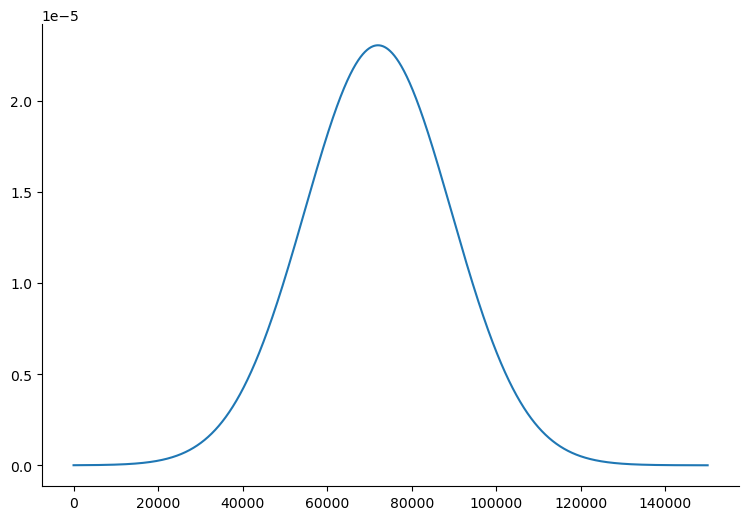

In [166]:
x = np.arange(0,150_000)
y =[sal_dist.pdf(i) for i in x]
plt.plot(x,y)

In [172]:
# 7a PCT of employees earn less than 65k?
sal_dist.cdf(65_000)

array([0.34270261])

In [173]:
# 7b PCT of employees earn more than 95k?
sal_dist.sf(95_000)

array([0.09208774])

In [174]:
# 7c PCT employees earn between 65k and 80k?
1- sal_dist.cdf(65_000) - sal_dist.sf(80_000)

array([0.33506122])

In [175]:
# 7d What salary constitutes the top 5% of salaries?
sal_dist.isf(0.05)

array([100484.58529677])